In [7]:
# pandas_datareader 0.5.0
# pandas 0.20.3
import PublicData as PD
import datetime as dt
from sklearn.cluster import *
import numpy as np
import matplotlib.pyplot as plt

def plot_regimes(df_with_regimes):
    n_regimes = len(df_with_regimes['regime'].unique())
    f, ax = plt.subplots(figsize=(10, 4))
    for regime, regime_df in df_with_regimes.groupby('regime'):
        ax.scatter(regime_df.index,
                   regime_df['close'].values,
                   label = "Regime %s" % regime)

    ax.grid()
    ax.legend(loc='best')
    return f, ax

In [4]:
# fetch timeseries of SPY data
spy_data = PD.get_timeseries_data('SPY', 
                                  start_dt = dt.datetime(2003, 12, 31),
                                  end_dt = dt.datetime(2017, 12, 31))

In [5]:
spy_data.head()

,open,high,low,close,volume
Date,,,,,
2003-12-31,111.23,111.52,110.84,111.28,29625800
2004-01-02,111.85,112.19,110.04,111.23,34487200
2004-01-05,111.61,112.52,111.59,112.44,27160100
2004-01-06,112.25,112.73,112.00,112.55,19282500
2004-01-07,112.43,113.06,111.89,112.93,28340200


In [25]:
# add some features to give us some information
spy_data['return_t0'] = spy_data['close'].pct_change()  # return today
spy_data['return_t5'] = spy_data['close'].pct_change(5)  # return over last week
spy_data['return_t20'] = spy_data['close'].pct_change(20)  # return over last month
spy_data['return_t60'] = spy_data['close'].pct_change(60)  # return over last quarter
spy_data['vol_t5'] = spy_data['return_t0'].rolling(5).std().multiply(np.sqrt(252))  # rolling 5 day std, annualized
spy_data['vol_t20'] = spy_data['return_t0'].rolling(20).std().multiply(np.sqrt(252))  # rolling 20 day std, annualized
spy_data['vol_t60'] = spy_data['return_t0'].rolling(60).std().multiply(np.sqrt(252))  # rolling 60 day std, annualized
X_df = spy_data.drop(['open', 'high', 'low', 'close', 'volume'], axis=1).dropna()

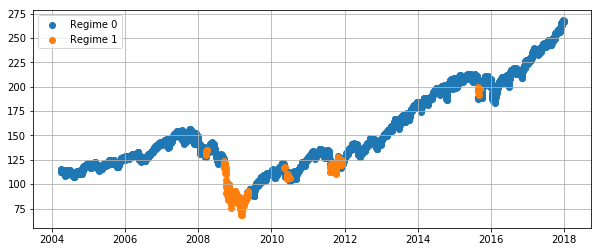

,count,mean,std,min,25%,50%,75%,max
regime,,,,,,,,
0,3198.0,0.000355,0.008479,-0.047778,-0.003548,0.000596,0.004999,0.035937
1,245.0,-0.000094,0.031259,-0.098448,-0.020343,0.001380,0.018837,0.145198


In [30]:
# KMeans with 2 Regimes
kmeans = KMeans(n_clusters=2, random_state=0)
# fit the kmeans
kmeans.fit(X_df.values)
# get the labels
regime_labels = kmeans.labels_
# add the labels to our data
plot_df = spy_data.loc[X_df.index, :].copy(deep=True)
plot_df['regime'] = regime_labels
# plot the regimes
knn_f, knn_ax = plot_regimes(plot_df) 
plt.show()
plt.close('all')

# describe the performance in the respective regimes
plot_df.groupby('regime')['return_t0'].describe()

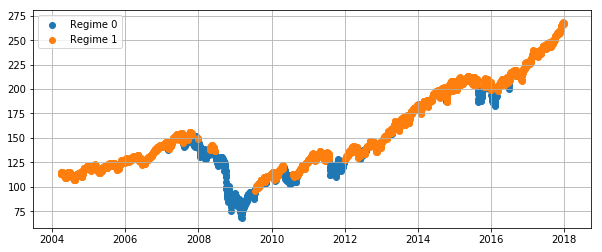

,count,mean,std,min,25%,50%,75%,max
regime,,,,,,,,
0,841.0,-0.000247,0.020359,-0.098448,-0.010883,0.000402,0.010304,0.145198
1,2602.0,0.000507,0.006785,-0.024606,-0.002972,0.000646,0.004483,0.022776


In [43]:
# Agglomerative Cluster with 2 regimes
dbsc = AgglomerativeClustering(n_clusters=2)
# fit the kmeans
dbsc.fit(X_df.values)
# get the labels
regime_labels = dbsc.labels_
# add the labels to our data
plot_df = spy_data.loc[X_df.index, :].copy(deep=True)
plot_df['regime'] = regime_labels
# plot the regimes
dbsc_f, dbsc_ax = plot_regimes(plot_df) 
plt.show()
plt.close('all')

# describe the performance in the respective regimes
plot_df.groupby('regime')['return_t0'].describe()